# Testing

In [ ]:
import os
import numpy as np
from scipy.signal import hilbert
import soundfile as sf
import sounddevice as sd

class GetAudio:
    def get_wav_info(self, ruta_archivo):
        with sf.SoundFile(ruta_archivo) as f:
            self.audio_data = f.read(dtype='float32')
            self.audio_samplerate = f.samplerate
            self.audio_n_canales = f.channels
            # self.audio_n_frames = len(f)
            # self.audio_duration = self.audio_n_frames / self.audio_samplerate
            # self.audio_subtype = f.subtype
            self.audio_filename = os.path.basename(ruta_archivo)

audio2 = GetAudio()
audio2.get_wav_info("../utils/tono.wav")
# audio2.get_wav_info("../utils/music_mono.wav")
# audio.get_wav_info("../utils/vowel_3.wav")

print(audio2.audio_filename)
print(audio2.audio_samplerate)
print(audio2.audio_data.shape[0])
print(audio2.audio_n_canales)

# sd.play(audio2.audio_data, audio2.audio_samplerate)
# sd.wait()

tono.wav
44100
44100
1


# Mensaje para SSB FC

In [11]:
# Exportar clases
from ssb import SSB
from signal_plot import Signal_plot
############################ Modulación SSB mono

ssb = SSB()
plots = Signal_plot()

mensaje2 = audio2.audio_data
samplerate2 = audio2.audio_samplerate
freq_carrier2 = 5000
error_fase2 = 0
error_frecuencia2 = 0


# Mensaje

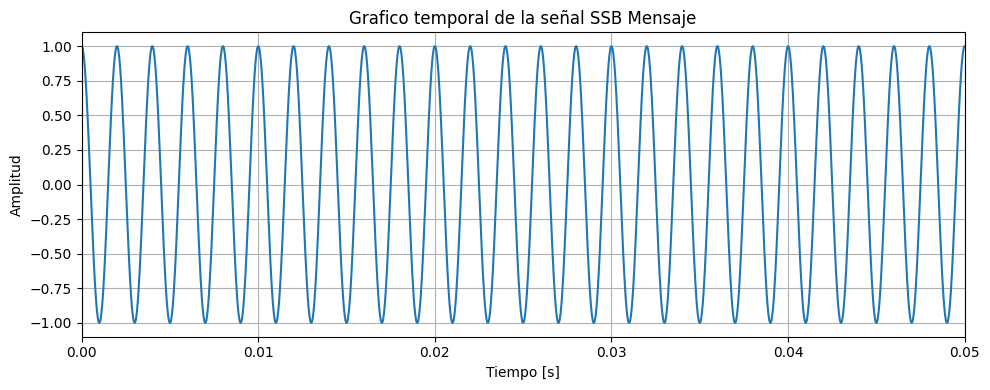

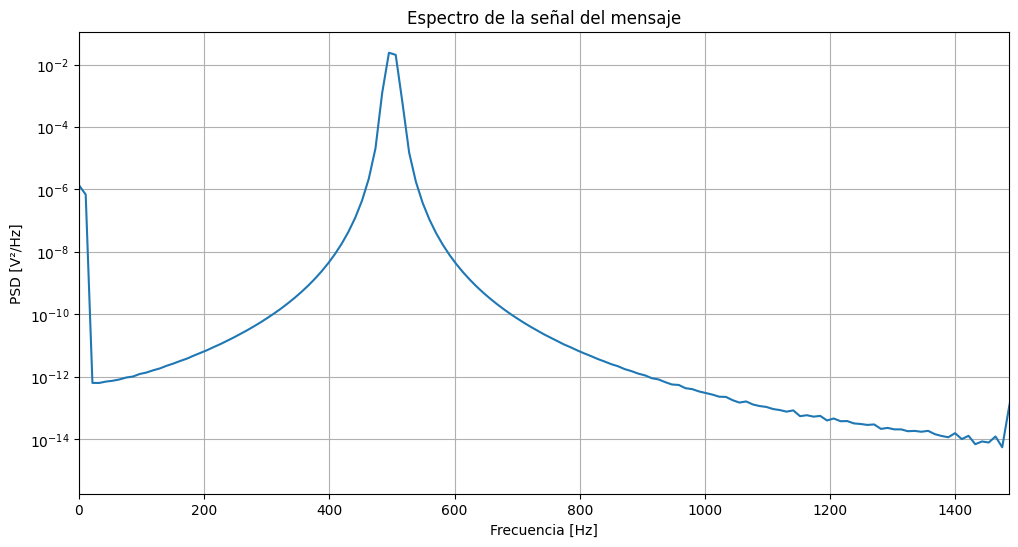

In [12]:
plots.graficar_senal("Mensaje", mensaje2, samplerate2, 0.05)
# plots.graficar_espectro("Espectro del mensaje", mensaje, samplerate)
plots.graficar_espectro_welch("del mensaje", mensaje2, samplerate2, 3)

# sd.play(audio2.audio_data, audio2.audio_samplerate)
# sd.wait()

# SSB FC

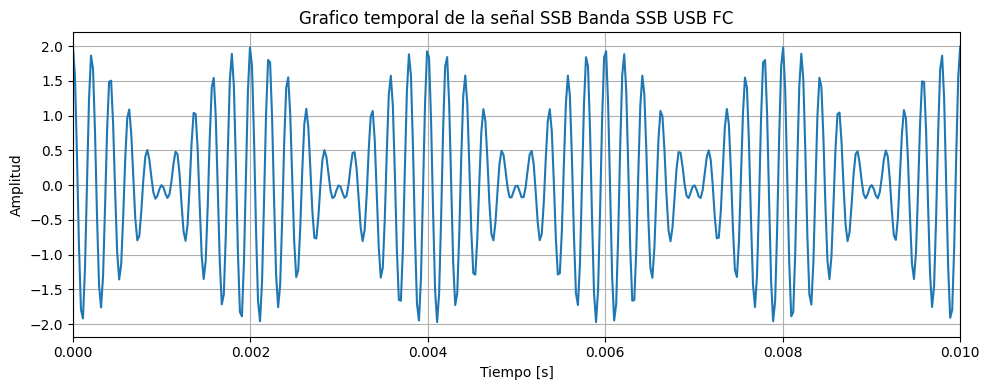

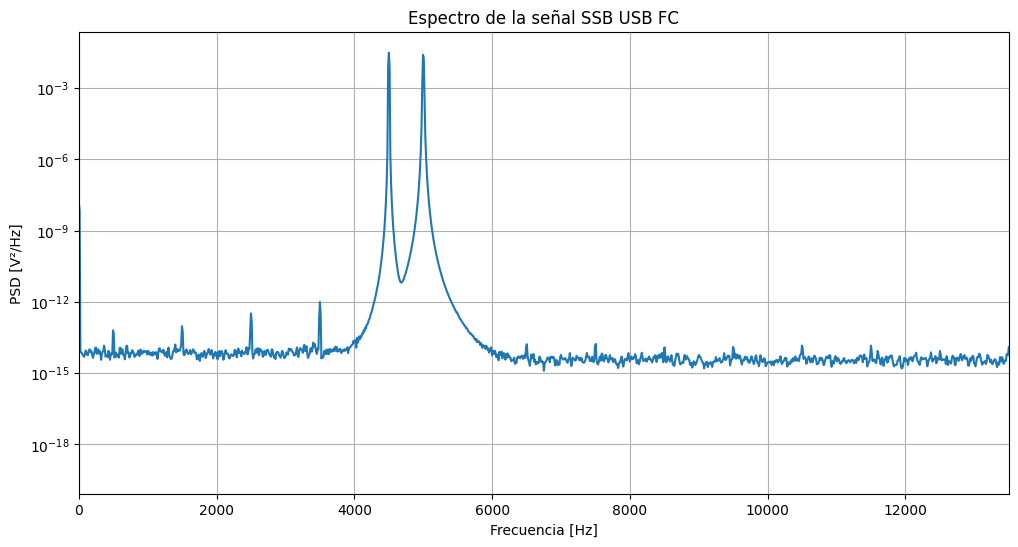

In [13]:
ssb_banda_lateral_fc = ssb.ssb_mono_mod(mensaje2, samplerate2, "FC", "LSB", freq_carrier2, error_fase2, error_frecuencia2)
plots.graficar_senal("Banda SSB USB FC", ssb_banda_lateral_fc, samplerate2, 0.01)
plots.graficar_espectro_welch("SSB USB FC", ssb_banda_lateral_fc, samplerate2, 3)

# sd.play(ssb_banda_lateral_fc, audio2.audio_samplerate)
# sd.wait()

# Demod SSB FC

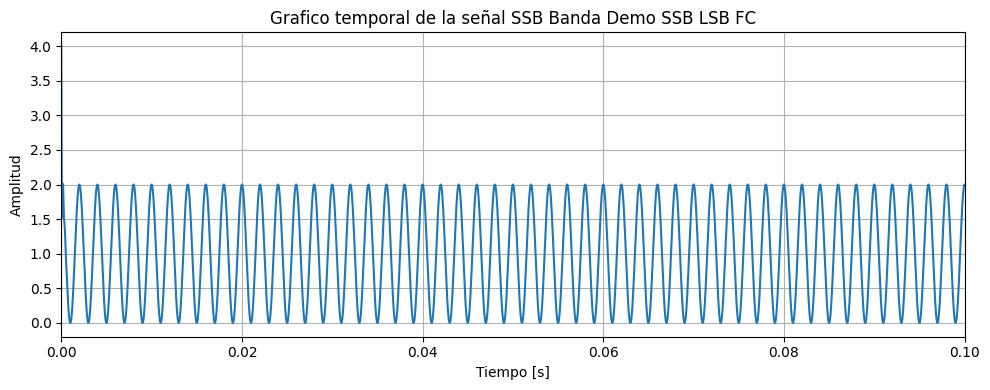

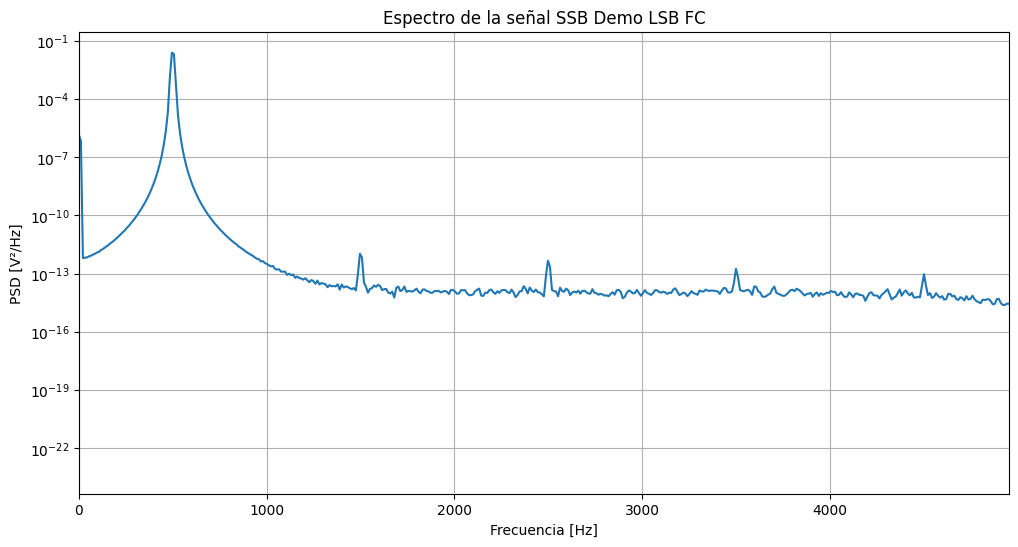

In [14]:
ssb_banda_lateral_demod_fc = ssb.ssb_mono_demod_fc(ssb_banda_lateral_fc, freq_carrier2, samplerate2, "LSB")
plots.graficar_senal("Banda Demo SSB LSB FC", ssb_banda_lateral_demod_fc, samplerate2, 0.1)
plots.graficar_espectro_welch("SSB Demo LSB FC", ssb_banda_lateral_demod_fc, samplerate2, 10)

sd.play(ssb_banda_lateral_demod_fc, samplerate2)
sd.wait()